# readDiag

O pacote `readDiag` foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primeira para ler os dados (`read_diag`) e outra para fazer diferentes tipos de figuras com dados selecionados (`plot_diag`).

## A Classe `read_diag`

A classe read_diag é composta por 5 funções:

1. `__init__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)`: sendo `diagFile` o arquivo de diagnóstico do primeiro outer loop com informação do OmF e `diagFileAnl` do último outer loop com informação do OmA. Note que não é necessário informar os dois arquivos, o `diagFileAnl` é opcional. Neste caso, a informação lida (Omf ou OmA) dependerá do outer loop (arquivo diagnóstico) fornecido;
2. `overview(self)`: esta função cria e retorna um dicionário com as informações existentes no arquivo;
3. `pfileinfo(self)`: esta função imprime de forma elegante uma lista com as informações existentes no arquivo;
4. `close(self)`: esta função fecha o último arquivo aberto;
5. `tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay=None, SingleL=None)`: esta função gera um arquivo CSV dos parâmetros OmF e OmA com as seguintes informações: data, média, desvio-padrão e total de dados para a variável e tipo escolhidos.
    
Os dados de entrada da função e funcionalidades são idênticas àquelas da função `time_series` que é apresentada na próxima seção na classe `plot_diag` (item 7 - ver também detalhes das funcionalidades [aqui](#time_series)). O que distingue as duas funções é que esta escreve um arquivo CSV e a outra gera figuras de séries temporais.

## A Classe `plot_diag`
    
A classe plot_diag é composta por 7 funções:

1. `plot(self, varName, varType, param, mask=None, **kwargs)`: a função `plot` gera uma figura para a variável `varName` (ex: `uv`), `varType` (ex: `220` (dropssonda)) e `param`, que pode ser várias opções como: `param="obs"` para o valor da observação, `param="omf"` para observação menos background ou `param="oma"` para observação menos análise. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=220`, `param="obs"` e mask `iuse==1"`;

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>
    
2. `ptmap(self, varName, varType=None, mask=None, **kwargs)`: a função `ptmap` gera uma figura com a localização de todas as observações definidas por `varName` (ex: `uv`) e `varType` (pode ser um único tipo ou uma lista, ex: `[200]` ou `[220,221,257]`. Se `varType` não for informado, então todos os tipos serão incluídos na figura. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=[254,242,221,220,257,258,281,280]` e `mask=None`; 

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png style="width: 800px;">
<br>

3. `pvmap(self, varName=None, mask=None, **kwargs)`: a função `pvmap` é similar à função `ptmap`, com a diferença de não especificar o tipo (`varType`), podendo então escolher uma lista de variáveis, ex: `["uv","ps","t"]`. Abaixo há um exemplo executado para `varName=['uv','ps','t']`, e `mask=None`; 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

4. `pcount(self,varName,**kwargs)`: a função `pcount` gera um histograma da quantidade de dados para uma determinada variável `varName` (ex: `uv`) e todos os tipos disponíveis (`varType`);

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

5. `kxcount(self,**kwargs)`: a função `kxcount` é similar à `pcount`, porém não especifica a variável (`varName`). Esta função gera um histograma com o total de dados (todas as variáveis somadas) para todos os tipos disponíveis (`varType`);

<img src=notefigs/kxcount.png style="width: 800px;">
<br>

6. `vcount(self,**kwargs)`: a função `vcount` gera um histograma com a quantidade total de dados para cada variável (`ps`, `t`, `q`, `uv`);

<img src=notefigs/vcount.png style="width: 800px;">
<br>

7. `time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay=None, SingleL=None, Clean=None)`: a função `time_series` pode gerar 6 tipos distintos de figuras, dependendo da configuração especificada na sua chamada. A característica comum entre os 6 tipos é a variação no tempo, enquanto que a diferença entre os 6 tipos é a forma de tratar os níveis verticais. Basicamente estas formas são distribuídas entre variar na vertical (diferentes valores para diferentes níveis/camadas) e fixo na vertical (nível específico, média na camada ou toda a atmosfera). 

No decorrer deste notebook são mostrados exemplos com recortes de código para exemplificar o uso das funções acima elencadas.

**Nota:** esta é uma versão simplificada do notebook `readDiag_tutorial_completo-pt_br.ipynb`.

## Utilização da classe `read_diag`

### Bibliotecas necessárias

Para iniciar a utilização do `readDiag`, carregue primeiro as bibliotecas necessárias para a sua utilização:

* `gsidiag`: é a biblioteca que contém as classes `read_diag` e `plot_diag`;
* `pandas`: é a biblioteca que fornece as estruturas de dados tabulados utilizadas pelo `readDiag`;
* `matplotlib`: é a biblioteca a partir da qual são confeccionadas as figuras.

A instrução `%matplotlib inline` é um comando mágico do Jupyter e apenas ajusta o ambiente para que não seja necessário utilizar o comando `plt.show()` sempre que figuras forem mostradas dentro do notebook. Se você estiver utilizando o `readDiag` dentro de um script Python, esta diretiva pode ser suprimida e o comando `plt.show()` deve ser utilizado, a depender da situação.

In [29]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Com a biblioteca principal carregada, abra o arquivo `diag_conv_01.2020031112` (~64 MB). Este arquivo está contido no diretório `data` deste repositório e é fornecido para testar as funcionalidades do `readDiag`. Este é um arquivo contém as informações de diagnósticos das observações convencionais do GSI, provenientes da minimização da função custo 3DVar, válido para a data 2020031112.

Para abrir o arquivo, será criado o objeto `file`, a partir do qual serão utilizados as funções e os métodos embutidos do `readDiag`.

**Nota:** o parâmetro `%%time` é um comando mágico do Jupyter para contabilizar o tempo de execução das células do notebook e não é necessário para a utilização do `readDiag`.

Para carregar o arquivo indicado, faça:

In [30]:
%%time

file = gd.read_diag('../data/diag_conv_01.2020031112')

 
>>> GSI DIAG <<<
 
diag2python :: open() File already open: ../data/diag_conv_01.2020031112
CPU times: user 28.7 s, sys: 4.39 s, total: 33.1 s
Wall time: 33.1 s


### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [31]:
file.pfileinfo()

Variable Name : ps
              └── kx => 181  180  120  187  183  

Variable Name : t
              └── kx => 181  180  120  187  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  258  281  280  253  243  254  220  287  221  284  230  244  259  252  242  250  210  229  224  282  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> file.
file.close(      file.obsInfo     file.pfileinfo(  file.zlevs       
file.tocsv(      file.overview(   file.varNames    
file.obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

In [32]:
print(file.pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


ou ainda:

In [33]:
help(file.pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [34]:
file.obsInfo

{'ps':                   lat         lon    elev          prs     hgt   press   time  \
 kx  points                                                                      
 181 0      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -180.0   
     1      -70.760002   11.830000   123.0   958.400024   123.0   900.0    0.0   
     2      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0   60.0   
     3      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0    0.0   
     4      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -120.0   
 ...               ...         ...     ...          ...     ...     ...    ...   
 183 3732    66.529999  341.980011    17.0   987.400024    17.0   900.0 -180.0   
     3733    65.269997  346.420013    11.0   978.099976    11.0   900.0 -180.0   
     3734    49.430000  357.399994   102.0  1003.400024   102.0  1000.0 -120.0   
     3735    63.779999  341.929993    38.0   972.099976    38.0   900.0    0.0   
     3736 

Para acessar uma variável específica (ex: `uv`), faça:

In [35]:
varName = 't'
print('Variável: ', varName)

file.obsInfo[varName]

Variável:  t


lat        lon    elev         prs     hgt  press   time  \
kx  points                                                                   
181 0      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -180.0   
    1      -70.760002   11.83000   123.0  958.400024   123.0  900.0    0.0   
    2      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0   60.0   
    3      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0    0.0   
    4      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -120.0   
...               ...        ...     ...         ...     ...    ...    ...   
126 2640    39.709999  280.98999   763.0  879.000000  1183.0  800.0   90.0   
    2641    39.709999  280.98999   763.0  872.099976  1247.0  800.0   90.0   
    2642    39.709999  280.98999   763.0  865.299988  1312.0  800.0   90.0   
    2643    39.709999  280.98999   763.0  858.500000  1376.0  800.0   90.0   
    2644    39.709999  280.98999   763.0  851.700012  1441.0  800.0   90.0   

            idqc  iuse  iusev     wpbqc       inp_err       adj_err  \
kx  points                                                            
181 0        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    1        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    2        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    3        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    4        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
...          ...   ...    ...       ...           ...           ...   
126 2640     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2641     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2642     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2643     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2644     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   

                  inverr           oer         obs        omf  \
kx  points                                                      
181 0       9.090909e-12  1.100000e+11  257.250000  10.005481   
    1       9.090909e-12  1.100000e+11  263.350006   8.443922   
    2       9.090909e-12  1.100000e+11  257.149994   7.287628   
    3       9.090909e-12  1.100000e+11  257.350006   7.147639   
    4       9.090909e-12  1.100000e+11  257.850006   9.619534   
...                  ...           ...         ...        ...   
126 2640    1.000000e-17  1.000000e+17  278.750000  -0.777656   
    2641    1.000000e-17  1.000000e+17  277.850006  -1.536891   
    2642    1.000000e-17  1.000000e+17  277.950012  -1.106795   
    2643    1.000000e-17  1.000000e+17  277.649994  -1.074093   
    2644    1.000000e-17  1.000000e+17  278.250000  -0.125823   

                              geometry  
kx  points                              
181 0        POINT (2.52000 -72.00000)  
    1       POINT (11.83000 -70.76000)  
    2        POINT (2.52000 -72.00000)  
    3        POINT (2.52000 -72.00000)  
    4        POINT (2.52000 -72.00000)  
...                                ...  
126 2640    POINT (-79.01001 39.71000)  
    2641    POINT (-79.01001 39.71000)  
    2642    POINT (-79.01001 39.71000)  
    2643    POINT (-79.01001 39.71000)  
    2644    POINT (-79.01001 39.71000)  

[119806 rows x 18 columns]

Para acessar variável e tipo específicos (ex: `uv` do tipo `220`), faça:

In [36]:
varType = 120
print('Variável: ', varName, ' e Tipo: ', varType)

file.obsInfo[varName].loc[varType]

Variável:  t  e Tipo:  120


,lat,lon,elev,prs,hgt,press,time,idqc,iuse,iusev,wpbqc,inp_err,adj_err,inverr,oer,obs,omf,geometry
points,,,,,,,,,,,,,,,,,,
0,-30.670000,24.000000,1287.0,871.0,1.287000e+03,800.0,-45.000000,2.0,1.0,0.0,3.999999,1.250000,0.980566,0.266639,3.750382,300.649994,-0.785228,POINT (24.00000 -30.67000)
1,-30.670271,23.999821,1287.0,867.0,1.000000e+11,800.0,-44.865601,2.0,1.0,0.0,3.850856,1.250000,0.849141,0.849141,1.177661,297.450012,-3.986862,POINT (23.99982 -30.67027)
2,-30.671200,23.999109,1287.0,855.0,1.000000e+11,800.0,-44.461800,2.0,1.0,0.0,3.989482,1.250000,0.880636,0.880636,1.135542,296.450012,-3.529222,POINT (23.99911 -30.67120)
3,-30.671721,23.998690,1287.0,850.0,1.508000e+03,800.0,-44.263199,2.0,1.0,0.0,3.991446,1.250000,1.004662,1.004662,0.995360,295.950012,-3.491445,POINT (23.99869 -30.67172)
4,-30.675381,23.996031,1287.0,819.0,1.000000e+11,800.0,-43.195198,2.0,1.0,0.0,3.996317,1.250000,1.250000,1.250000,0.800000,292.850006,-3.333173,POINT (23.99603 -30.67538)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30751,76.829857,349.991333,14.0,5.8,1.000000e+11,0.0,55.483200,2.0,1.0,0.0,3.999999,0.666667,0.489252,0.489252,2.043936,235.649994,1.432701,POINT (-10.00867 76.82986)
30752,76.822647,350.371216,14.0,5.1,1.000000e+11,0.0,58.462799,2.0,1.0,0.0,3.999996,0.666667,0.555556,0.555556,1.800000,238.850006,2.843098,POINT (-9.62878 76.82265)
30753,76.809792,350.601929,14.0,4.7,1.000000e+11,0.0,60.394798,2.0,1.0,0.0,3.830203,0.666667,0.555556,0.555556,1.800000,245.449997,7.515910,POINT (-9.39807 76.80979)


O parâmetro `varType` pode ser também uma lista, ex: `varType=[220,221]`:

In [37]:
varTypes = [120,180]

print('Variável: ', varName, ' e Tipos: ', varTypes)

file.obsInfo[varName].loc[varTypes]

Variável:  t  e Tipos:  [120, 180]


lat         lon    elev         prs           hgt  press  \
kx  points                                                                   
120 0      -30.670000   24.000000  1287.0  871.000000  1.287000e+03  800.0   
    1      -30.670271   23.999821  1287.0  867.000000  1.000000e+11  800.0   
    2      -30.671200   23.999109  1287.0  855.000000  1.000000e+11  800.0   
    3      -30.671721   23.998690  1287.0  850.000000  1.508000e+03  800.0   
    4      -30.675381   23.996031  1287.0  819.000000  1.000000e+11  800.0   
...               ...         ...     ...         ...           ...    ...   
180 7629    59.099998  348.399994     0.0  981.200012  0.000000e+00  900.0   
    7630    60.500000  355.799988     0.0  978.700012  0.000000e+00  900.0   
    7631    60.500000  355.799988     0.0  978.599976  0.000000e+00  900.0   
    7632    60.700001  357.600006     0.0  980.599976  0.000000e+00  900.0   
    7633    60.700001  357.600006     0.0  979.299988  0.000000e+00  900.0   

                  time  idqc  iuse  iusev     wpbqc  inp_err   adj_err  \
kx  points                                                               
120 0       -45.000000   2.0   1.0    0.0  3.999999     1.25  0.980566   
    1       -44.865601   2.0   1.0    0.0  3.850856     1.25  0.849141   
    2       -44.461800   2.0   1.0    0.0  3.989482     1.25  0.880636   
    3       -44.263199   2.0   1.0    0.0  3.991446     1.25  1.004662   
    4       -43.195198   2.0   1.0    0.0  3.996317     1.25  1.250000   
...                ...   ...   ...    ...       ...      ...       ...   
180 7629    120.000000   2.0   1.0    0.0  3.997105     0.40  0.400000   
    7630    -60.000000   2.0   1.0    0.0  3.997035     0.40  0.400000   
    7631    120.000000   2.0   1.0    0.0  3.997046     0.40  0.400000   
    7632    -60.000000   2.0   1.0    0.0  3.996586     0.40  0.400000   
    7633    120.000000   2.0   1.0    0.0  3.994974     0.40  0.400000   

              inverr       oer         obs       omf  \
kx  points                                             
120 0       0.266639  3.750382  300.649994 -0.785228   
    1       0.849141  1.177661  297.450012 -3.986862   
    2       0.880636  1.135542  296.450012 -3.529222   
    3       1.004662  0.995360  295.950012 -3.491445   
    4       1.250000  0.800000  292.850006 -3.333173   
...              ...       ...         ...       ...   
180 7629    0.182234  5.487441  276.549988 -0.302922   
    7630    0.386903  2.584628  281.250000  0.625806   
    7631    0.383495  2.607593  278.149994 -0.586516   
    7632    0.247692  4.037271  279.549988 -1.467377   
    7633    0.396733  2.520586  277.250000 -2.644140   

                              geometry  
kx  points                              
120 0       POINT (24.00000 -30.67000)  
    1       POINT (23.99982 -30.67027)  
    2       POINT (23.99911 -30.67120)  
    3       POINT (23.99869 -30.67172)  
    4       POINT (23.99603 -30.67538)  
...                                ...  
180 7629    POINT (-11.59998 59.10000)  
    7630     POINT (-4.20001 60.50000)  
    7631     POINT (-4.20001 60.50000)  
    7632     POINT (-2.40002 60.70000)  
    7633     POINT (-2.40002 60.70000)  

[38390 rows x 18 columns]

Para acessar o valor da observação, utilize o método `obs`:

In [38]:
print('Variável: ', varName, ' e Tipo: ', varType)

file.obsInfo[varName].loc[varType].obs

Variável:  t  e Tipo:  120


points
0        300.649994
1        297.450012
2        296.450012
3        295.950012
4        292.850006
            ...    
30751    235.649994
30752    238.850006
30753    245.449997
30754    241.649994
30755    243.850006
Name: obs, Length: 30756, dtype: float32

## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

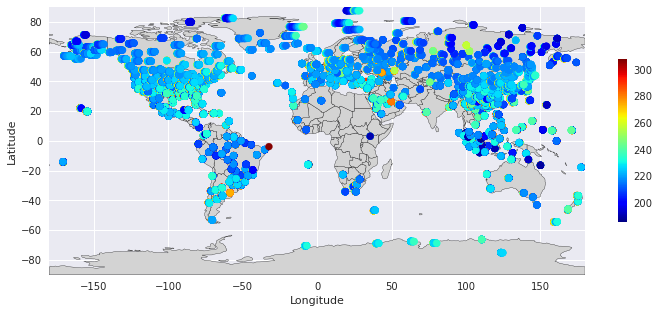

In [39]:
param = 'obs'

gd.plot_diag.plot(file, 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')

Para salvar a figura, defina o seu nome (`figname`) e execute os comandos a seguir:

In [40]:
figname = varName + '_' + param + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

<Figure size 576x396 with 0 Axes>

Gerando a mesma figura, mas considerando vários tipos diferentes (`kx`) da observação selecionada:

ValueError: list.remove(x): x not in list

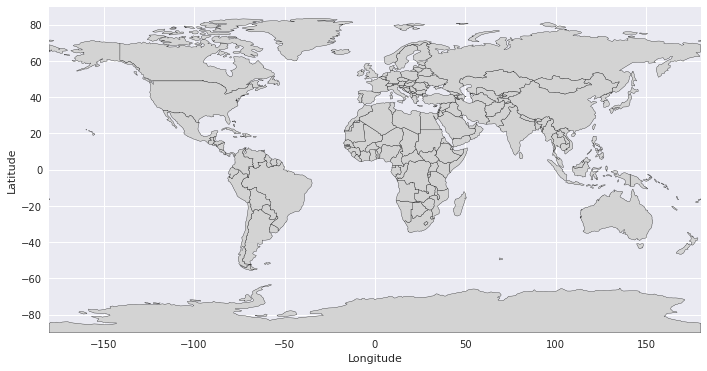

In [28]:
varTypes = [254,242,221,220,257,258,281,280]
idschar = '_'.join([str(item) for item in varTypes])

gd.plot_diag.ptmap(file, varName=varName, varType=varTypes)

figname = varName + '_' + idschar + '_' + 'ptmap.png'

plt.tight_layout()
plt.savefig(figname)

Gerando uma figura com diferentes variáveis, considerando a máscara `iuse==1`:

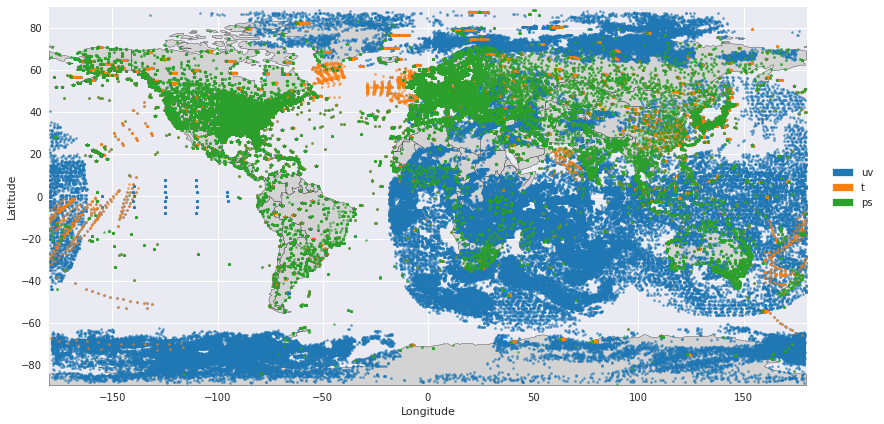

In [41]:
varNames = ['uv','ps','t']
idschar = '_'.join([str(item) for item in varNames])

gd.plot_diag.pvmap(file, varName=varNames, mask='iuse==1')

figname = idschar + '_pvmap.png'

plt.tight_layout()
plt.savefig(figname)

### Histograma

Utilize a função `pcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para uma determinada variável:

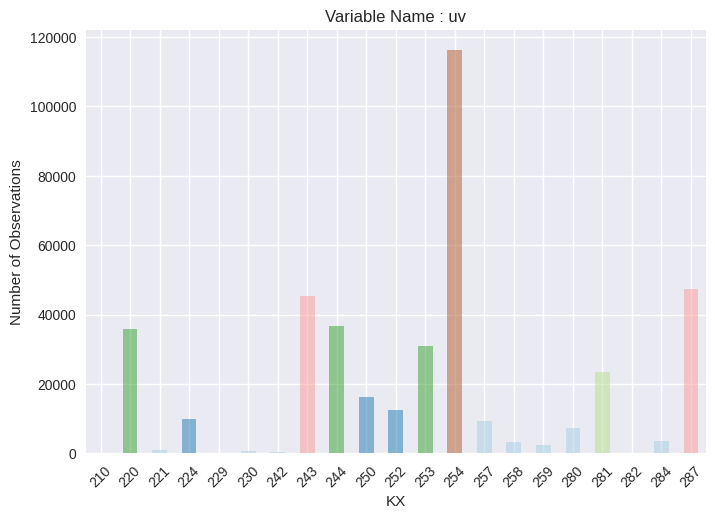

In [15]:
gd.plot_diag.pcount(file, varName)

Utilize a função `vcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para todos os tipos de variáveis:

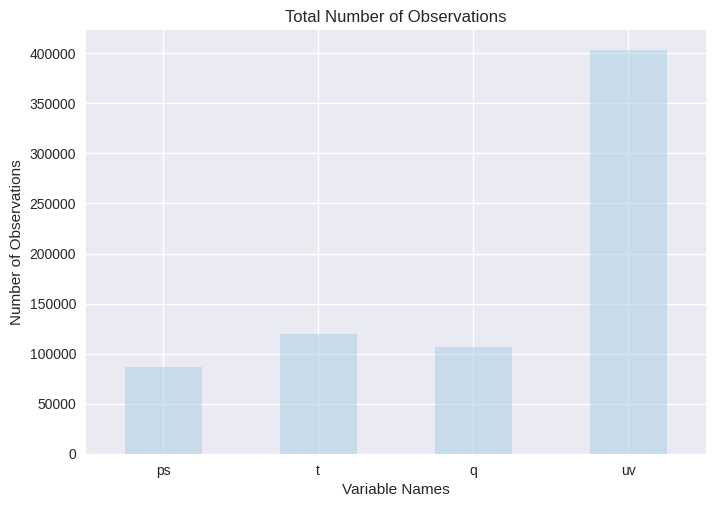

In [16]:
gd.plot_diag.vcount(file)

De forma semelhante, utilize a função `kxcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações por tipo:

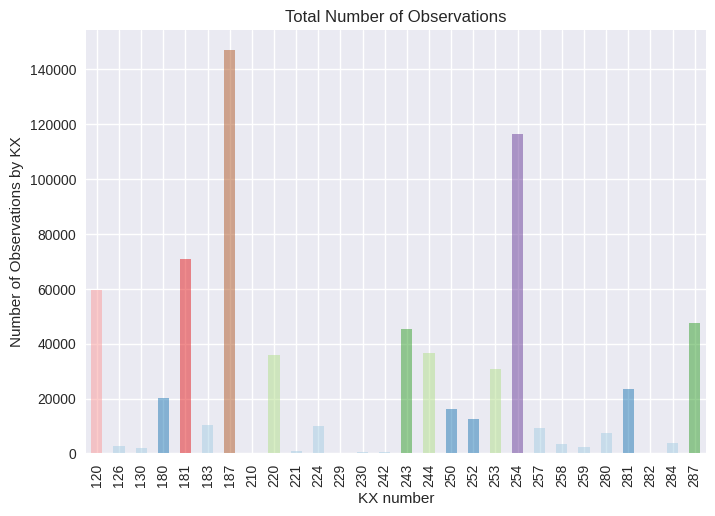

In [17]:
gd.plot_diag.kxcount(file)

Como estamos lidando apenas com um arquivo (i.e., com apenas uma única data), não podemos criar uma série temporal dos valores de OmA e OmF. Para isso, com alguns arquivos em mão, utilize os exemplos contidos no notebook `readDiag_tutorial_simples-pt_br.ipynb`.

Finalizado o uso do arquivo, feche-o para liberar a memória utilizada:

In [18]:
file.close()

0

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.